In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

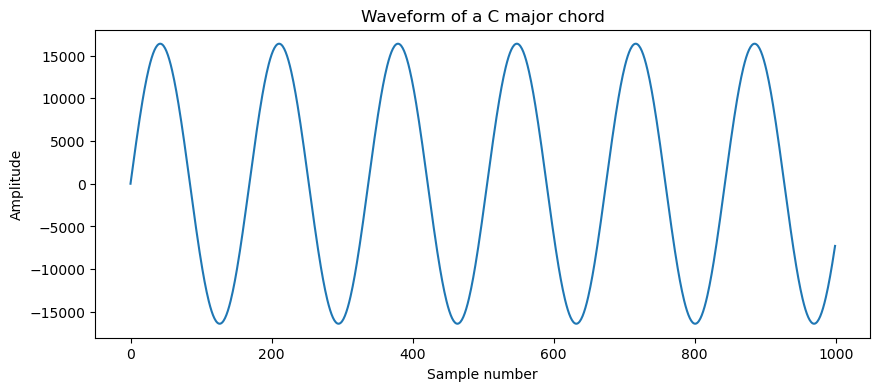

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# Parameters for the audio file
sample_rate = 44100  # Sample rate in Hz
duration = 2.0  # 音の長さ(s)
class MusicMaker:
    def __init__(self,frequencies,durarion):
        self.frequencies = frequencies
        self.duration = duration
        self.sample_rate = 44100


    def generate_tone(self,frequency):
        t = np.linspace(0, duration, int(self.sample_rate * self.duration), False)  # Time axis
        tone = 0.5 * np.sin(2 * np.pi * frequency * t)  # Generate sine wave
        return tone

    def generate_chord(self,frequencies):
        chord = np.zeros(int(sample_rate * self.duration))
        for freq in self.frequencies:
            tone = self.generate_tone(freq)
            chord += tone
        chord /= len(frequencies)  # Normalize the sound wave
        return chord
    
    def ten_to_sixty(self,chord):
        return np.int16(chord * 32767)



# Define the frequencies for a C major chord: C, E, G, 329.63, 392.00
frequencies = [261.63]  # C4, E4, G4

# Generate the chord
music_make  = MusicMaker(frequencies, duration)
chord = music_make.generate_chord(frequencies)
chord16 = music_make.ten_to_sixty(chord)


# Write the chord to a WAV file
wav_file = 'cmajor_chord.wav'
write(wav_file, sample_rate, chord)

plt.figure(figsize=(10, 4))
plt.plot(chord16[:1000])  # Plot the first 1000 samples to visualize the waveform
plt.title("Waveform of a C major chord")
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.show()